# Political Ads in the Brexit Campaign
### Analysing the content of Vote Leave Facebook ads using Computer Vision
By Yente Meijers
<pre style="font-size: 21px; font-family: Times; text-align: left;
    white-space: pre-line;">
The Vote Leave Campaign
</pre>
<pre style="font-size: 18px; font-family: Times; text-align: left;
    white-space: pre-line;">
In the aftermath of the Brexit Referendum in the United Kingdom in 2016, there was a huge controversy around the pro-Brexit campaign advertisements. The official Vote Leave campaign spent over £2.7m on targeted ads on Facebook, which most likely contributed to the outcome of the 2016 EU referendum. In 2018, Facebook was forced to release the ads in question to the British parliament, who were investigating the use of fake news in the pro-Brexit campaign. These ads were created by Aggregate IQ and focused on specific issues such as immmigration or animal rights, depending on the group of people they were trying to target based on personal data from Facebook. Older people were targeted with ads relating to the National Healthcare Service, whereas younger people were more targeted by ads promising a better future.

There are 1,433 different adverts in the data released by Facebook These adverts were viewed more than 169 million times in total. These ads are very likely to have had a major impact on the outcome of the Brexit referendum in 2016. Many ads contain fake news and in interviews after the referendum, leave voters have expressed their belief in these false claims. The UK's electoral commission concluded that Vote Leave breached election campaign spending via another pro-Brexit campaign, BeLeave, that was also paying Aggregate IQ to run targeted ads on Facebook (Risso, 2018). In the case of these pro-Brexit ads, there were tremendous repercussions for not just the UK but for the European Union as well. The Vote Leave campaign proved the power of targeted ads on Facebook and the importance for political science researchers to look at campaign advertising, not only in election context but also related to referendums.

Because these ads had such an incredible impact on politics for years to come, they are important to study. In this project, I will look at what objects can be detected using a Computer Vision method, so that the analysis can be easily scaled up for analysing a large number of political advertisements. Facebook supplied all the ads to the Department for Digital, Culture, Media and Sport in July 2018 following the department's inquiry into fake news. All the ads that will be analysed in this project can be found <a href="https://www.parliament.uk/globalassets/documents/commons-committees/culture-media-and-sport/Fake_news_evidence/Vote-Leave-50-Million-Ads.pdf">in this official document</a> 
</pre>
<pre style="font-size: 21px; font-family: Times; text-align: left;
    white-space: pre-line;">
Computer Vision
</pre>
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
In today's society mass media use of visual content to persuade people to make commercial and political decisions, something that has also been picked up in political campaigns (Joo et al., 2014, p.1). Therefore, images and videos play an important role in today’s  political communication, especially during election campaigns, or in the case of this project, referendum campaigns (Haim et al., 2020, p. 55). Academics have long been researching texts but the study of images is more recent. To analyse political images at scale, scholars have turned to computer vision techniques (Schmøkel & Bossetta, 2022, p. 98). The innovations around computer vision methods have enabled researchers to better understand political advertising.

In this project, to analyse the many advertisements used by the Vote Leave campaign, I will use <b>computer vision</b>, which means using a computer to analyse images or other visual content instead of looking at it yourself (Szeliski, 2010, p. 3). By using computer vision, researchers can increase the size of their image datasets and produce results faster. In computer vision, it is important to use machine learning models that are trained on large data sets to improve the accuracy (Szeliski, 2010, p. 3). Computer vision trains machines to act like the human function of visual perception, but it has to do it in less time with cameras, data and algorithms rather than retinas, optic nerves and a visual cortex. Computer vision models can analyse countless of images a minute, noticing imperceptible details and thus can even surpass human abilities.

A core functionality of computer vision methods is object detection. Using an object recognistion computer vision models will recognise and locate objects in a given image (Szeliski, 2014, p. 295). It puts bounding boxes around objects it has identified and attempts to label these objects. Because the political advertisements used by the Vote Leave campaign were different from a regular election campaign, the ads were often not of politicians but of many different things depending on who the targeted audience was. 

All of the analyses in this project use Huggingface (2022) Transformers, which provides APIs and tools to easily download state-of-the-art pretrained machine learning models.

<i><b>Important note</b>: In order to run all the code cells in this Jupyter notebook, the user should check that their Python environment is at least <b>Python 3.10.8</b>. For the best visual experience, please open this Jupyter notebook in an environment capable of displaying html text in markdown cells such as the online Anaconda based version of Jupyter notebook or VS Code because Google Colab will not display the text in the markdown cells nicely.
</pre>

In [1]:
# Install the required packages 
!pip install -q numpy pandas matplotlib opencv-python==4.5.5.64 tensorflow transformers timm easyocr wordcloud

# Load required packages
## General
import urllib.request
import os
import zipfile
import pandas as pd
import glob
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

## Computer Vision
from transformers import pipeline
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import cv2
import torch
from PIL import Image
### OCR
import easyocr
from wordcloud import WordCloud

c:\Users\yente\miniconda3\envs\compvis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the data
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
The images are available in a PDF from the British government. I used an online Image from PDF extractor to save the images separately. The folder with the images to be analysed is available as a public .zip file on Google Drive.</pre>

<h3 style="margin-left: 100px; font-family: Times; font-size: 20px">1. Importing the zip file</h3>
        <pre style="font-size: 18px; font-family: Times; white-space: pre-wrap;">
        To get the image dataset, we need to download it from where it is stored on Google Drive as a .zip file.  
        </pre>

<h3 style="margin-left: 100px; font-family: Times; font-size: 20px">2. Unzipping the zip file</h3>
        <pre style="font-size: 18px; font-family: Times; white-space: pre-wrap;">
        In order to fully automate the process of getting the data, there is also a code cell that unzips the zipfile into a newly created subfolder in the working directory into which the images are extracted. The images are now located in the working directory and accesible for further analysis.
        </pre>

<h3 style="margin-left: 100px; font-family: Times; font-size: 20px">3. Sorting the images </h3>
        <pre style="font-size: 18px; font-family: Times; white-space: pre-wrap;">
        Because computer vision analysis is very resource intensive, I will run different parts of my analysis on different subsets of my data. Therefore, I make the image data set splittable.
        </pre>

In [2]:
# Download the image data set in zip from a Google Drive download link
url = "https://drive.google.com/uc?export=download&id=1d_UBEMPWfc9zPEPclTZRbtIiG0Aw4gYo"
fp = "cv-data.zip"
urllib.request.urlretrieve(url, fp)

('cv-data.zip', <http.client.HTTPMessage at 0x1de05a54be0>)

In [3]:
# Unzipping the images

## First create a new folder to save the extracted images into
os.makedirs('cv-data', exist_ok=True)

## Then extract the images into the new folder
with zipfile.ZipFile("cv-data.zip", mode="r") as archive:
         archive.extractall(path="cv-data")

# Sorting the images and make the data set easily splittable for further analysis
image_files = list(sorted(glob.glob('cv-data/*.jpg'), key=lambda x: int(x.replace(".", "-").split("-")[2])))

## Exploring the image data set
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
In order to get a better sense of what kind of images are included in the dataset, I will explore the input prior to further analysis. For example, resizing might be necessary and I will also check the images are not too for the computer vision models. To preserve as much information in the images as possible, I have also chosen not to crop the images. </pre>

In [4]:
# Get count of number of images
print(len(image_files))

# Get the size and dimensions of the images
## Put all the images in a list and then use cv2 to get the dimensions and pixel count
image_stats_list = []
for image_file in image_files:
    img = cv2.imread(image_file)
    height, width, channels = img.shape
    image_stats_list.append({"height": img.shape[0], "width": img.shape[1]})

# Put the information about the images into a dataframe
image_stats = pd.DataFrame(image_stats_list)
image_stats["pixel_count"] = image_stats["height"] * image_stats["width"]

# Print the image dimensions
print(image_stats.head())
print("Max values")
print(image_stats.max())
print("Min values")
print(image_stats.min())

100
   height  width  pixel_count
0     313    599       187487
1     314    599       188086
2     314    599       188086
3     337    601       202537
4     313    599       187487
Max values
height            396
width             720
pixel_count    271440
dtype: int64
Min values
height            300
width             599
pixel_count    179700
dtype: int64


<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Based on these checks the images did not need to be resized, transformed or filtered. I performed the checks to ensure that the images were all in the right size to reduce the likelihood of this impacting the analysis. According to the documentation of the machine learning models I will use, the models have all been trained on COCO (COCO, 2022). COCO  is an image dataset, the standard for object detection model training. The images in this dataset are everyday photos, they are different size and from different cameras. Therefore, if an image is too small and the pipeline does not process it, the pipeline would crash and not produce results. This did not happen in this project so therefore the images are of a suitable size.
</pre>

# Analysis
## Object Detection
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
First, I will perform object detection analysis on the Vote Leave ads to identify what kind of objects are present in these ads. I will use a pre-trained transformer based model (Huggingface, 2022). This model will identify objects in each image, locate the objects and also attach a label to them. I will use a pre-trained model because I do not have pre-labelled data, which is necessary to train your own machine learning algorithm. 

I will use the <a href="https://huggingface.co/facebook/detr-resnet-50">DETR (End-to-End Object Detection) model with ResNet-50 backbone</a> available on Huggingface, which is a transformer based model with a convolutional backbone. It is the slightly condensed version of the model with ResNet-101 backbone, which is the most downloaded object detection model available on Huggingface.
</pre>

In [5]:
# Defining the model as object detection using Transformers
## I do not specify the model because I want to use the default, which is DETR (End-to-End Object Detection) model with ResNet-50 backbone
model = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\yente\miniconda3\envs\compvis\lib\site-packages\transformers\models\detr\image_processing_detr.py:773: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [6]:
# Running Object Detection on the images in my dataset

rows_list = []
## To reduce running time, I will run this part of the analysis only on the first half of the data set
for img in image_files[0:50]:
  # runs object detection
  res = model(img)
  # save the results 
  for result_dict in res:
    result_dict["image"] = img
    rows_list.append(result_dict)

# put the results into a dataframe
df_res = pd.DataFrame(rows_list)

# show the first few rows of the dataframe
df_res.head()

,score,label,box,image
0,0.998428,sports ball,"{'xmin': 464, 'ymin': 11, 'xmax': 598, 'ymax':...",cv-data\img-1.jpg
1,0.999367,person,"{'xmin': 260, 'ymin': 33, 'xmax': 485, 'ymax':...",cv-data\img-1.jpg
2,0.946478,cell phone,"{'xmin': 215, 'ymin': 99, 'xmax': 378, 'ymax':...",cv-data\img-2.jpg
3,0.976952,sports ball,"{'xmin': 130, 'ymin': 95, 'xmax': 274, 'ymax':...",cv-data\img-4.jpg
4,0.930786,person,"{'xmin': 0, 'ymin': 68, 'xmax': 118, 'ymax': 335}",cv-data\img-4.jpg


<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
As we can see in the dataframe above, the model was not able to detect any objects in image three because there are no labels for that image. Below I will look at the image 3 of the dataframe to look at why this might be the case.
</pre>

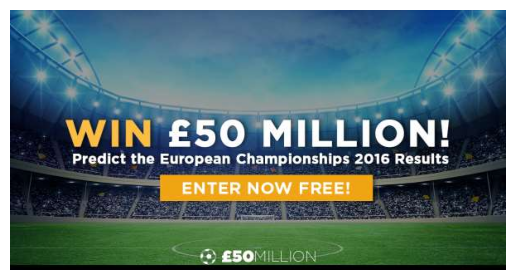

In [98]:
# Show the image with no objects detected
# Select the image
img = cv2.imread('cv-data/img-3.jpg')

#Convert the colour from BGR to RGB so that Matplotlib can display it correctly
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
%matplotlib inline
plt.axis("off")
plt.imshow(img)

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
The image in question is one which has one main object as kind of a background to the text. We can see that it is a football stadium but the edges are cut off and it is understandable why the machine learning model did not pick up on any single object. Here we can thus clearly see the limitations of using computer vision, as the model might not be able to pick up on objects that are not clearly defined. Next, I will look at the images that did have objects identified in them and visualise one of these images to show what the model is picking up on.
</pre>

### Visualising the results of object detection
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Below I will show an example of an image with objects detected in it. The, I will also show in a graph how often certain objects were identified.
</pre>

       score   label                                                box  \
60  0.932646  bottle  {'xmin': 270, 'ymin': 213, 'xmax': 299, 'ymax'...   
61  0.951550     car   {'xmin': 1, 'ymin': 1, 'xmax': 597, 'ymax': 311}   
62  0.994731  person   {'xmin': 0, 'ymin': 0, 'xmax': 235, 'ymax': 149}   

                 image  
60  cv-data\img-46.jpg  
61  cv-data\img-46.jpg  
62  cv-data\img-46.jpg  


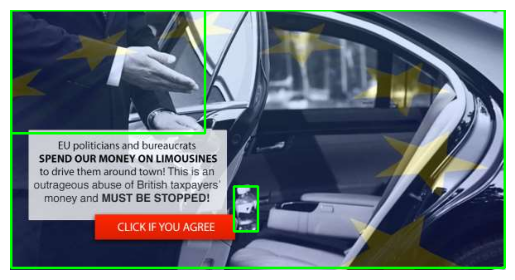

In [58]:
# Show the labels for one specific image
print(df_res[df_res.image=="cv-data/img-46.jpg"])

# Next, visualise the the image with the object boxes
## Draw the box using the dimensions given by the model 
img = cv2.imread('cv-data/img-46.jpg')
for index,row in df_res[df_res.image=="cv-data/img-46.jpg"].iterrows():
  x1,y1,x2,y2 = row.box.values()
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Change the colour settings to display normally
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
%matplotlib inline
plt.imshow(img)
plt.axis('off')
plt.show()

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
As we can see, the model detected three objects in this image. It detected 'bottle', 'man' and 'car', all of which we can clearly see in the image with the bounding boxes. 
Next, I will visualise how many times certain objects were detected in the image dataset.
</pre>

<AxesSubplot: title={'center': 'Frequency of Objects Detected'}, xlabel='Objects'>

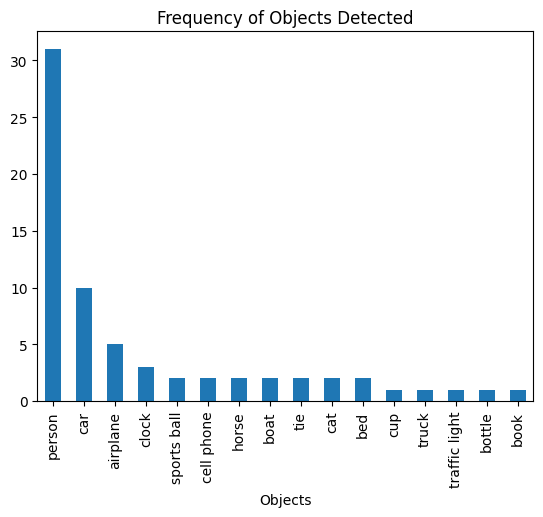

In [99]:
# Graph the number of times a specific object is detected
title1 = 'Frequency of Objects Detected'
df_res.label.value_counts().plot(kind='bar', xlabel='Objects', title=title1)

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
As we can see in the graph, the ads most often contain a person. Next, cars and airplanes were also very common. These objects are all pretty generic but it makes sense that political advertising contains 'person' the most by a long shot.

Next, because most images had multiple objects detected in them, I will look at if there are certain pairs of objects that co-occur in the adverts.
</pre>

<AxesSubplot: title={'center': 'Pair of objects'}, xlabel='Object pairs'>

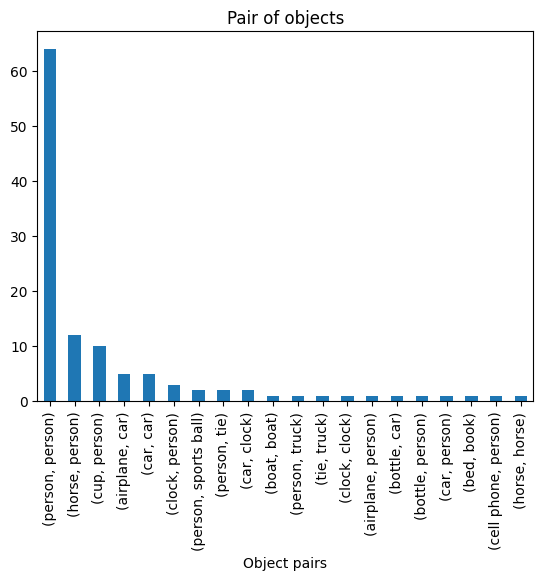

In [56]:
# Visualising the most common pairs of objects identified in images
combo_counts = Counter()

# Group into results for each image
for name, group in df_res.groupby("image"):
    
    # Get the labels associated with an image
    labels = group["label"].values

    # Get all pairs of these labels
    # i.e. if there are 2 people then 1 pair (person, person) will be made
    # if there are 3 people then there 3x pairs of (person, person)
    # if there are 2 people and 1 horse there will 2x (person, horse) and 1x (person, person)
    label_pairs = combinations(labels, r=2)
 
    for label_pair in label_pairs:

        #Alphabetically sort the pair, to get it consistent for plotting
        sorted_pair = tuple(sorted(label_pair))
        combo_counts[sorted_pair] += 1

# Create th graph
combo_series = pd.DataFrame.from_records(combo_counts.most_common(), index=0)[1]
title2= 'Pair of objects'
combo_series.plot(kind='bar', xlabel='Object pairs', title=title2)

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
As we can see in the graph, the most common combination of objects is multiple persons together, and the next most common co-occurences also involve a person. This reaffirms the result that most adverts contain at least one person.

In the next step of analysis, I will look at the text in the images. 
</pre>

## Optical Character Recognition (OCR)

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
We as humans can also immediately read the text on the image to help us understand what is going on when the objects alone are not enough. That is why, after performing object detection, I will also perform Optical Character Recognition (OCR) on the images in my data set, which means getting the model to read text in the image (Szeliski, 2014, p. 3). From the images I have shown above, we can tell that these ads probably have an important textual element to them and it is thus crucial to not only look at the objects in the image but also the text.
</pre>

In [16]:
# OCR
## Set the OCR reader to English
reader = easyocr.Reader(['en'])

## For the OCR part of the analysis, I will run the model on the second half of the image data set to reduce running time
ocr_list = []
for img in image_files[50:]:
  # run the ocr 
  result = reader.readtext(img, detail = 0)  
  # save text results into a list
  ocr_list.append(' '.join(result))

## Save the results in the list into a string
text =' '.join(ocr_list)

# Print a small section of the results to get a sense of the text on the ads
print(text[0:1000])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
As we can see, the models appears to pick up on a lot of text in the ads. To explore the kind of words that come up in the ads, I will visualise the results of the OCR analysis as a word cloud.
</pre>

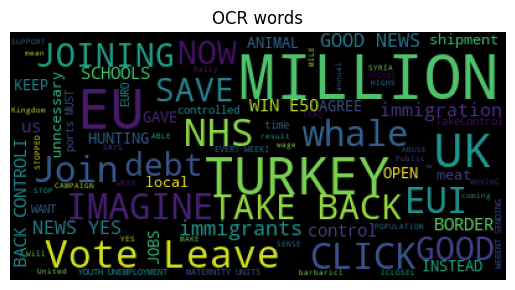

In [54]:
# Generate wordcloud with seed to ensure same result each time cell is executed
wordcloud = WordCloud(max_words = 80, max_font_size = 50, random_state = 4).generate(text)

# Showing the word cloud
title3 = "OCR Words"
plt.title(title3, fontsize=12)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
In the word cloud we can see words which come up a lot in the ads. The biggest one is 'million' which relates to the promise that Brexit would save the UK tons of money and emphasised how much money the EU cost the UK. This is also related to 'NHS', which was promised more funding if the UK left the EU, as well as 'debt'. There are also many words related to migration, such as 'Turkey', 'border', 'control', 'immigrants'. Another interesting one is 'whale' which appears to have been present a lot in ads targeted at young people concerned with animal welfare. The claim was that the EU still endorsed whaling. Words such as 'vote leave', 'save', 'take back' and 'imagine' were also to be expected.

The results are limited by only running the image captioning on a small subset of the image dataset and there would have probably been a greater diversity in the words if more ads had been included. However, it is a time consuming process for the model to generate captions for each image. 
</pre>

## Image Captioning
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Because political advertisements are often not only about the text or the objects separetely but rather what is going on in the image as a whole, I wanted to take this computer vision analysis one step further. In the next part, I will apply a Huggingface transformer based image captioning model to get descriptions of the images instead of only the objects or text in the image. Image captioning means that the model generates a desciription of what is going on in the image, combining the visual with the textual, which is easier to then further analyse (Szeliski, 2014, p.319).

I will use the <a href="https://huggingface.co/nlpconnect/vit-gpt2-image-captioning">vit-gpt2-image-captioning</a> available on Huggingface because this is the most used model for image captioning available. The default model that Huggingface provides is not quite state-of-the-art.
</pre>

In [18]:
# Image captioning

# Setting up the model because I want to use a specific one that is more state-of-the-art than the default model for image captioning 
# than if using the Huggingface transformers pipeline with no model specification

#Specifying the mode, feature_extractor and tokeniser
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Specifying which machine learning framework to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Specifying how long I want my captions to be
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

In [67]:
# Using the specified model to caption images
## To reduce processing time, I will run the model for image captioning on a subset of the image data set
image_subset = image_files[:30]

# Run the image captioning model
caption_predictions = predict_step(image_subset)

# Save the results into a string for the word cloud
all_caption_text = ' '.join(caption_predictions)

a woman holding a cell phone in front of a train


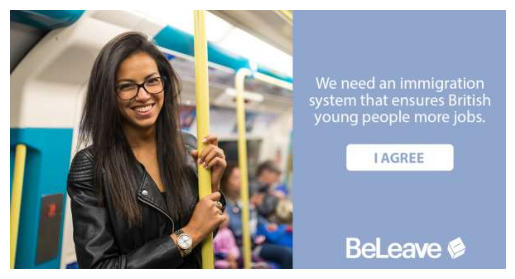

In [93]:
# Print the caption for the image that the object detection 
print(caption_predictions[5])

# Next, visualise the the image 
img1 = cv2.imread('cv-data/img-6.jpg')

# Change the colour settings to display normally
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Show the image
%matplotlib inline
plt.imshow(img1)
plt.axis('off')
plt.show()

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Above, you can see the caption for a specific image. The generated caption gets some things right, it sees that there is a woman and a train but the woman is not holding a phone.

Because we now again have textual data based on the images, I will make another word cloud to consider if there are major differences in the text on the image compared to the description of the image.
</pre>

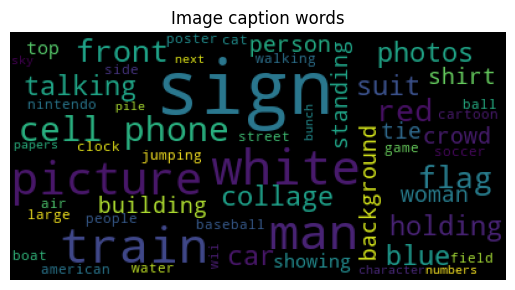

In [70]:
# Generate wordcloud with seed to ensure same result each time cell is executed
wordcloud2 = WordCloud(max_words = 60, max_font_size = 60, random_state = 7).generate(all_caption_text)

# Generate wordcloud with seed to ensure same result each time cell is executed
title4 = "Image caption words"
plt.title(title4, fontsize=12)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
In the word cloud we can see that there is very different words that seem to come up in the captions of the images compared to the actual text in the image. We can see words such as 'red' and 'white', which are very British (more specifically English) colours and present in the Union Jack 'flag'. We can also see 'man' which indicates what kind of people are present in most of the ads. Interstingly we also see 'sign' and 'picture', which tell us that something related to showing is happening in the ads. We can also still see 'person' which reaffirms the results from the object detection analysis.

The results are limited by only running the image captioning on a small subset of the image dataset and there would have probably been a greater diversity in the words if more ads had been included. However, it is a time consuming process for the model to generate captions for each image. 
</pre>

# Discussion
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Based on the three different types of computer vision techniques performed in this project, we now have a better idea of what the Vote Leave ads during the pro-Brexit campaign looked like and contained. All these different methods have pros and cons as they give us different information about the image. All together, we can get a pretty holistic undrestanding of the content of these images, which is that they mostly contain people and that there are some different themes in terms of what the text says (immigration, nationalism and money).

In general, we could see that using computer vision is quite resource intensive in terms of processing time and power required to run these machine learning models. My dataset contained only 100 images and yet I still decided to run most analyses on a subset of that data because otherwise each step of analysis would take up quite a bit of time. However, compared to the human effort required to manually perform these analysis, this processing time is nothing and it is easy to understand why social scientists would want to use computer vision models to analyse large image datasets. 
</pre>

## References
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">

COCO (2022) Common Objects in Context. Available at: <a>https://cocodataset.org/#home</a> (Accessed: 12 January 2023).

Haim, M. & Jungblut, M. (2021) ‘Politicians’ Self-depiction and Their News Portrayal: Evidence from 28 Countries Using Visual Computational Analysis’, <i>Political Communication</i>, 38(1–2), pp. 55–74. doi: 10.1080/10584609.2020.1753869.

Huggingface (2022) 🤗 Transformers. Available at: <a>https://huggingface.co/docs/transformers/index</a> (Accessed: 15 December 2022).</pre>
<pre style="font-size: 18px; font-family: Times; white-space: pre-wrap;">
    Models used: Object Detection <a>https://huggingface.co/facebook/detr-resnet-50</a>
                 Image Captioning <a>https://huggingface.co/nlpconnect/vit-gpt2-image-captioning</a></pre>
<pre style="font-size: 18px; font-family: Times;  text-align: left;
    white-space: pre-line;">
Joo, J., Li, W., Steen, F. & Zhu, S. (2014) ‘Visual Persuasion: Inferring Communicative Intents of Images’, in <i>IEEE Computer Society Conference on Computer Vision and Pattern Recognition.</i>

Neuendorf, K. A. (2017) <i>The Content Analysis Guidebook</i>. Thousand Oaks, California: SAGE Publications. doi: 10.5260/chara.19.4.38.

Risso, L. (2018) ‘Harvesting your soul? Cambridge analytica and brexit’, in Jansohn, C. (ed.) <i>Brexit Means Brexit</i>. Mainz: Akademie der Wissenschaften und der Literatur, pp. 75–90.

Schmøkel, R. & Bossetta, M. (2022) ‘FBAdLibrarian and Pykognition: open science tools for the collection and emotion detection of images in Facebook political ads with computer vision’, <i>Journal of Information Technology and Politics</i>, 19(1), pp. 118–128. doi: 10.1080/19331681.2021.1928579.

Szeliski, R. (2010) <i>Computer Vision</i>. 2nd edn. Cham: Springer.
</pre>